In [21]:
import tensorflow as tf

model_path = '/content/drive/MyDrive/Colab Notebooks/CCN_Deepfake.h5'
model = tf.keras.models.load_model(model_path)


1/1 [==============================] - 0s 39ms/step
Prediction for Image 1: Real
Prediction for Image 2: Deepfake
Accuracy: 100.0%


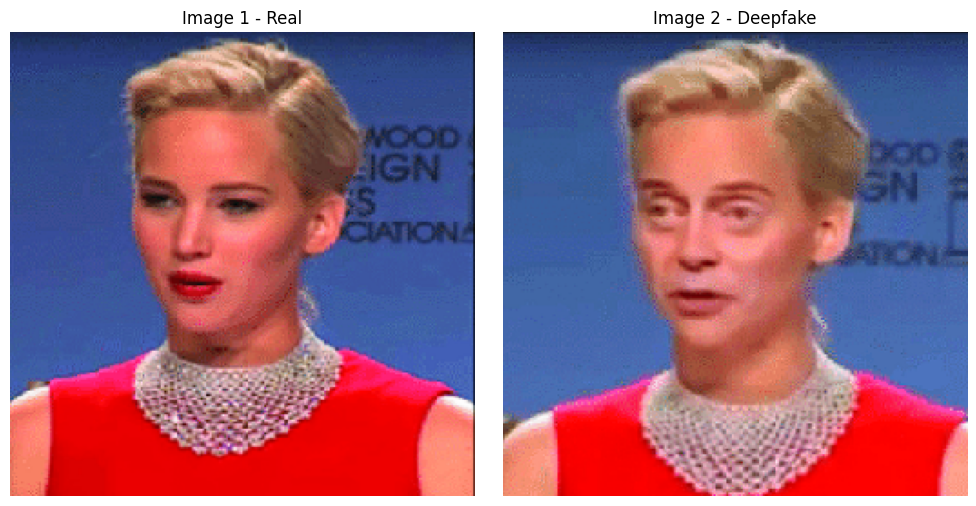

In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

def preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255
    return img, img_array


img_path_1 = '/content/PIC_1.png'
img_path_2 = '/content/PIC_2.png'


ground_truth_labels = ['Real', 'Deepfake']


img_1, img_array_1 = preprocess_image(img_path_1, target_size=(256, 256))
img_2, img_array_2 = preprocess_image(img_path_2, target_size=(256, 256))


model = load_model('/content/drive/MyDrive/Colab Notebooks/CCN_Deepfake.h5')


result_1 = model.predict(img_array_1)
prediction_1 = 'Real' if result_1[0][0] > 0.5 else 'Deepfake'


result_2 = model.predict(img_array_2)
prediction_2 = 'Real' if result_2[0][0] > 0.5 else 'Deepfake'


print(f'Prediction for Image 1: {prediction_1}')
print(f'Prediction for Image 2: {prediction_2}')


accuracy = sum(1 for pred, truth in zip([prediction_1, prediction_2], ground_truth_labels) if pred == truth) / len(ground_truth_labels) * 100
print(f'Accuracy: {accuracy}%')


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_1)
plt.title(f'Image 1 - {prediction_1}')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_2)
plt.title(f'Image 2 - {prediction_2}')
plt.axis('off')

plt.tight_layout()
plt.show()
